# CS-6580 Assignment 1 - A Simple Neural Network

**YOUR NAME HERE**

*Weber State University*

For our first assignment, we're going to build a simple, sequential neural network with Keras. Keras is a high-level deep learning [API](https://aws.amazon.com/what-is/api/) that allows you to easily build, train, evaluate, and execute all sorts of neural networks. Its documentation can be found [here](https://keras.io/). A good book, by Francois Chollet, the person who designed it, is [Deep Learning with Python](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1), one of the recommended books for this class. Keras has quickly gained popularity, owing to its ease of use, flexibility, and design.

To perform the heavy computations required by neural networks, Keras relies on a computation backend. At present, you can choose from (at least) TensorFlow, Microsoft Cognitive Toolkit, and Theano. In fact TensorFlow itself now comes bundled with its own Keras implementation, *tf.keras*. Unsurprisingly, it only supports TensorFlow as the backend, but it also offers some very useful extra features - for example, it supports TensorFlow's Data API, which makes it easy to load and preprocess data efficiently. For this reason, we'll use tf.keras in this class. However, most of what we do won't be TensorFlow specific, and so the code should mostly run fine on other Keras implementations that use Python. Note also that the PyTorch API is quite similar to Keras. This is mostly because they share a common ancestor in Scikit-Learn.

For this assignment, you should fill in all the sections of code where it says "# TODO". Once you're done with the assignment, you should upload your Jupyter notebook to Canvas. Please note the assignment is due by end of day Thursday, January 25th.



### TensorFlow

**What is TensorFLow?**

Before we dive into Keras, let's learn a bit more about TensorFlow, the computation backend we'll be using. TensorFlow is an open-source machine learning platform developed by Google that provides a powerful suite of tools for data scientists and developers to build, deploy, and train machine learning models. It was initially released in 2015, and has evolved significantly since. The TensorFlow library allows developers to create complex neural networks using a variety of programming languages, such as Python and JavaScript. Additionally, TensorFlow makes it easy to deploy models on mobile devices or cloud platforms like Google Cloud Platform (GCP) and Amazon Web Services (AWS).

TensorFlow is used in a variety of applications, ranging from natural language processing (NLP) and image recognition to predictive analytics and autonomous vehicle control. It can be used to train deep neural networks for object detection and classification, generate recommendations, classify images, and build voice-powered applications.

**What are Tensors?**

A tensor is, basically, an $n$-dimensional generalization of a matrix. A zero-dimensional tensor is a scalar, which contains a single value and has no axes. A one-dimensional tensor is a vector, which contains a list of values and has one axis. A two-dimensional tensor is a matrix that contains values stored across two axes.

<center>
    <div>
        <img src="https://lh3.googleusercontent.com/drive-viewer/AEYmBYQr-5-GiX8a77j6Q9HB3FcpEtSbUC0OSS7Wt2h2kXl9Dv9oV4Np_M0-j-8QNFliLHP8Ip-V9uXu6Xr6nJD2S5KsDHhA=s1600" width="1000"/>
    </div>
</center>

**How Does TensorFlow Work?**

At the core of TensorFlow is a dataflow graph, which describes how data moves through a series of operations or transformations. The basic idea behind the dataflow graph is that operations are expressed as nodes, with each node performing a single operation on its inputs. The inputs and outputs of the operations are passed through edges (tensors). This makes it possible to break down complex computations into smaller, more manageable chunks.

At the lowest level, each TensorFlow operation (*op* for short) is implemented using highly efficient C++ code. Many operations have multiple implementations called *kernels*: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (*tensor processing units*). As you may know, GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads. TPUs are even faster: they are custom ASIC chips build specifically for deep learning operations.

TensorFlow's API revolves, appropriately, around *tensors*, which flow from operation to operation - thus the name. A tensor is very similar to a NumPy *ndarray*: it is usually a multidimensional array, but it can also hold a scalar. Let's see how to create a manipulate them.

**Using TensorFlow - The Basics**

AIf you haven't installed TensorFlow you should do so. Please note you only need to do this once! It might take some time. If you need to install it, "uncomment" (remove the # at the start) the following:

Source: https://colab.research.google.com/github/aamini/introtodeeplearning

In [1]:
#pip install tensorflow

Once TensorFlow is installed, we can import it, along with the standard libraries any good data scientist should always have ready.

In [2]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's play around with creating some tensors. Let's first look at 0-d tensors, of which a scalar is an example:

In [3]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Vectors and lists can be used to create 1-d tensors:

In [4]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71828], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


Next we consider creating 2-d (i.e., matrices) and higher-rank tensors. For examples, for work involving image processing and computer vision, 4-d tensors are common. Here the dimensions correspond to the number of example images in our batch, image height, image width, and the number of color channels.

In [5]:
### Defining higher-order Tensors ###

# '''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[1, 2, 3], [4, 5, 6]], tf.int32)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [6]:
# '''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros(shape=[10, 256, 256, 3])

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

**Computations on Tensors**

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of the tensors, which hold data, and the mathematical operations that act on these tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/add-graph.png)

In [7]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how the output is a tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [8]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  # '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.add(b,-1)
  e = tf.multiply(c,d)
  return e

a = tf.constant(4)
b = tf.constant(5)
print(f"Output of func is: {func(a,b)}")

Output of func is: 36


Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [9]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## Keras

Now let's check out Keras. First, there are a few libraries we'll need. You don't need these to run Keras per se, just to make the model diagrams. Please install them if you have not.

In [10]:
#pip install pydot

In [11]:
#pip install graphviz

And now we'll import Keras from TensorFlow.

In [12]:
from tensorflow import keras

For this assignment, we'll build a neural network to classify the famous handwritten digits dataset. This is the "hello world" problem of neural networks. The basic idea is this - it's very difficult to say exactly what constituties a 7, but I think we'd all agree we (almost always) know one when we see it. For example, all of these are the different ways of writing the number 7:

<center>
    <div>
        <img src="https://lh3.googleusercontent.com/drive-viewer/AEYmBYRkaDabPqdzym65kfMVzQJoLaoKwWFuCop8xwzgdZbKsuNm015wBLU1AlUpDUIysIL74PlfpFYYpjgrd5debySeFyzGBA=s1600" width="1000"/>
    </div>
</center>

The dataset is publicly available, and is knows as the MNIST (Modified National Institute of Standards and Technology) dataset. You can learn more about it here:http://yann.lecun.com/exdb/mnist/ 

The Keras library contains a number of common machine learning datasets that you can load, including [MNIST](https://keras.io/api/datasets/mnist/). We can import it with the code below.

In [13]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
len(X_train_full), len(X_test)

(60000, 10000)

We see there are 60,000 training images and 10,000 test image. Each image from the input (X_train_full or X_test) is a $28 \times 28$ array, and each entry in this array is a grayscale darkness value from $0$ to $255$. For example:

In [14]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This data is split into a training set and a test set; however, it has no validation set. We'll want one, and so we can create one from the first 5000 images in the training set. Additionally, we'll want to scale the input features - which are represented as integers from $0$ to $255$ - down to the $0-1$ range.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

We'll use Keras to build a sequential neural network for identifying the digits. First, we'll create a very simple predictive model, in which there are ten outputs corresponding to the ten digits. Each output is a sigmoid that provides a probability. The first is how likely the input was a $0$, the second is how likely the input was a $1$, and so on.

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(10, activation="sigmoid"))

Let's go through this code line by line:

- The first line creates a *Sequential* model. This is the simplest kind of Keras model for neural networks that are composed of a single stack of layers connected sequentially.
- Next, we build the input layer and add it to the model. It is a "flatten" layer whose role is to convert each input image into a 1D array. This layer has no parameters, it just does some simple preprocessing.
- Next we add a dense output layer with 10 nodes (one per class), again using the sigmoid activation function.

Note that instead of adding the layers one-by-one, we could pass a list of layers when we create the model.

In [17]:
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid")
    ])
"""

'\nmodel = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[28,28]),\n    keras.layers.Dense(30, activation="sigmoid"),\n    keras.layers.Dense(10, activation="sigmoid")\n    ])\n'

The model's *summary()* method displays all the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape, and the number of parameters.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Keras even includes a tool for generating an image of the model.

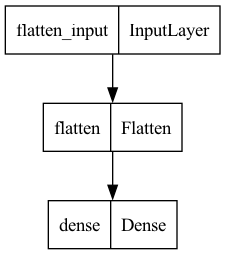

In [19]:
keras.utils.plot_model(model)

Not particularly enlightening for this model I'll admit.

***Compiling the Model***

After a model in created, you must call its *compile()* method to specify the loss function and the optimizer to use. You can also, if desired, specify a list of extra metrics to compute during training and evaluation.

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

This requires some explanation. First, we use the "sparse_categorical_crossentropy" loss because we have sparse labels (for each instance, there is just a target class index, from $0$ to $9$ in this case), and the classes are exclusive. If instead we had [one-hot](https://en.wikipedia.org/wiki/One-hot) vectors we would use "categorical_crossentropy" loss instead.

Regarding the optimizer, "sgd" means that we will train the model using simple stochastic gradient descent. Note the learning rate defaults to $lr = 0.01$, but we could specify it with *optimizer = keras.optimizers.SGD(lr=???)*.

Finally, since it is a classifier, it's useful to describe its "accuracy" during training and evaluation.

See these links for more info on [losses](https://keras.io/api/losses/), [optimizers](https://keras.io/api/optimizers/), and [metrics](https://keras.io/api/metrics/).

***Training the Model***

Now the model is ready to be trained. To do this, we just call its *fit()* method. We can also track its training history.

In [21]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7946 - accuracy: 0.8149 - val_loss: 0.4958 - val_accuracy: 0.8778
Epoch 2/20
1719/1719 [==============================] - 2s 876us/step - loss: 0.4679 - accuracy: 0.8786 - val_loss: 0.4104 - val_accuracy: 0.8924
Epoch 3/20
1719/1719 [==============================] - 1s 847us/step - loss: 0.4130 - accuracy: 0.8892 - val_loss: 0.3749 - val_accuracy: 0.9004
Epoch 4/20
1719/1719 [==============================] - 1s 297us/step - loss: 0.3855 - accuracy: 0.8946 - val_loss: 0.3532 - val_accuracy: 0.9048
Epoch 5/20
1719/1719 [==============================] - 1s 359us/step - loss: 0.3680 - accuracy: 0.8983 - val_loss: 0.3392 - val_accuracy: 0.9080
Epoch 6/20
1719/1719 [==============================] - 1s 461us/step - loss: 0.3555 - accuracy: 0.9015 - val_loss: 0.3295 - val_accuracy: 0.9086
Epoch 7/20
1719/1719 [==============================] - 1s 580us/step - loss: 0.3460 - accuracy: 0.9040 - val_loss: 0.3216 - v

Note that passing the validation set is optional. However, it's good practice. If the performance on the training set is much better than on the validation set, you've probably got an overfit model. Note that instead of passing a validation set using the *validation_data* argument, we could set *validation_split* to the ratio of the training set that you want Keras to use for validation. So, *validation_split = 0.1$ would tell Keras to use the last 10% of the data for validation.

The *fit()* method returns a *History* object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training data and the validation data (if provided). We can use this dictionary to create a pandas dataframe and then plot it.

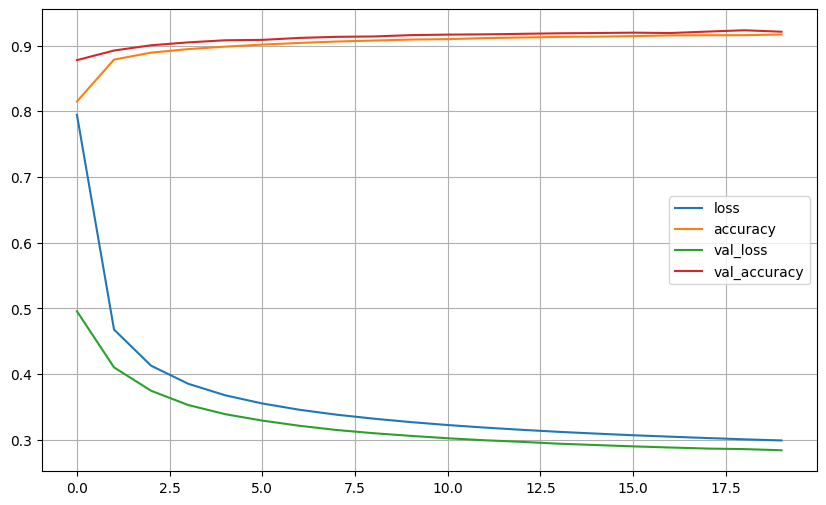

In [22]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()

Finally, we should verify how the model performs on the test set.

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 685us/step - loss: 0.2888 - accuracy: 0.9192


[0.28875765204429626, 0.9192000031471252]

The performance on the test set should be approximately the performance during training, which will be about 92% - 93%. This isn't so bad for just using a perceptron, but using a "multilayer perceptron" (MLP), or a "deep neural network", you should be able to do better. 

## Deep Learning

Recreate the model, but add an additional layer with 30 hidden nodes.

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
# TODO add a dense hidden layer with 30 nodes: DONE
model.add(keras.layers.Dense(30, activation="sigmoid"))

model.add(keras.layers.Dense(10, activation="sigmoid"))

In [32]:
# TODO Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


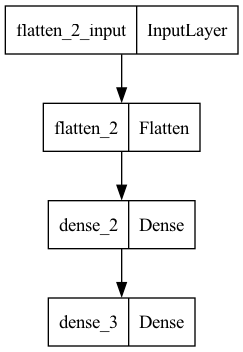

In [33]:
# TODO Generate an image of the model
keras.utils.plot_model(model)

In [34]:
# TODO Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

In [35]:
# TODO Train the model over 30 epochs
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 546us/step - loss: 1.7239 - accuracy: 0.6235 - val_loss: 1.2225 - val_accuracy: 0.7574
Epoch 2/30
1719/1719 [==============================] - 1s 725us/step - loss: 0.9746 - accuracy: 0.8083 - val_loss: 0.7757 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 1s 722us/step - loss: 0.6876 - accuracy: 0.8555 - val_loss: 0.5923 - val_accuracy: 0.8752
Epoch 4/30
1719/1719 [==============================] - 1s 649us/step - loss: 0.5563 - accuracy: 0.8750 - val_loss: 0.4961 - val_accuracy: 0.8910
Epoch 5/30
1719/1719 [==============================] - 1s 613us/step - loss: 0.4828 - accuracy: 0.8857 - val_loss: 0.4388 - val_accuracy: 0.8964
Epoch 6/30
1719/1719 [==============================] - 1s 746us/step - loss: 0.4363 - accuracy: 0.8917 - val_loss: 0.3998 - val_accuracy: 0.9038
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4043 - accuracy: 0.8974 - val_loss: 0.3723 - v

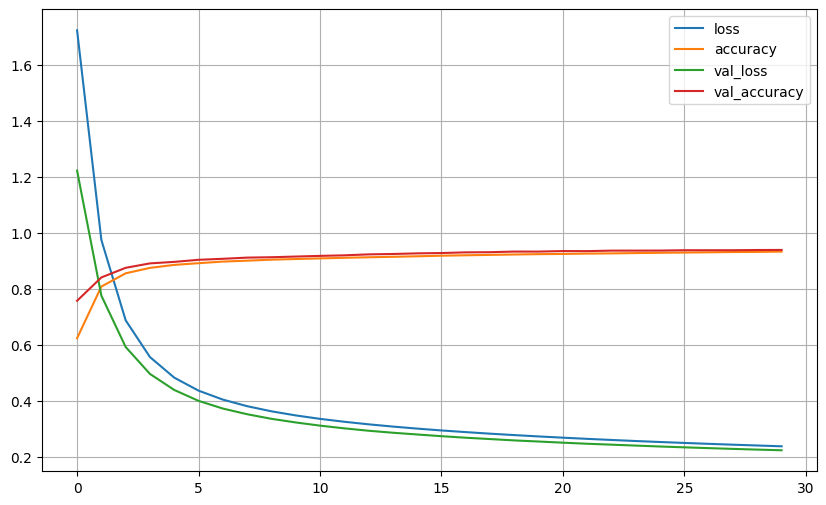

In [36]:
# TODO Plot the loss, accuracy, validation loss, and validation accuracy over the training epochs
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()

In [37]:
# TODO evaluate the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 444us/step - loss: 0.2295 - accuracy: 0.9347


[0.22948752343654633, 0.9347000122070312]

### Challenge

If you complete the above you've completed the assignment. However, if you're up for a challenge, try (just using sequential neural networks in Keras) to create a model that does as well as possible on the test data. Show your work below. The person with the top performance will receive extra credit on this assignment.

Rob: I happen to know from experience that convolutional neural networks are superior to sequential neural networks when it comes to computer vision. I'm going to adapt the work I did with Assignment 6 in CS-6570 for the Fashion Images to apply to the MNIST set. Importantly, the input shape for MNIST is 28x28 vs the 1-dimensional data (784x1) for Fashion Images.


In [42]:
inputs = keras.Input(shape=(28, 28), name="MNIST Images")                       
x = keras.layers.Conv1D(filters=2,kernel_size=2,activation="relu") (inputs)     # The input data is 1 dimensional so all the types need to change from 2D to 1D
x = keras.layers.MaxPooling1D(pool_size = 3)(x)                                 # The decreasing pool size is that initally I want the pool search area to be coarsely grained then become finely grained on the deeper layer of the network
x = keras.layers.Conv1D(filters=4,kernel_size=3,activation="relu") (inputs)     
x = keras.layers.MaxPooling1D(pool_size = 4)(x)
x = keras.layers.Conv1D(filters=8,kernel_size=4,activation="relu") (inputs)     
x = keras.layers.MaxPooling1D(pool_size = 5)(x)
x = keras.layers.Conv1D(filters=16,kernel_size=5,activation="relu") (inputs)    
x = keras.layers.MaxPooling1D(pool_size = 6)(x)
x = keras.layers.Conv1D(filters=32,kernel_size=6,activation="relu") (inputs)    
x = keras.layers.MaxPooling1D(pool_size = 7)(x)
x = keras.layers.Conv1D(filters = 64, kernel_size=7, activation="relu")(inputs)
x = keras.layers.MaxPooling1D(pool_size=8)(x)
x = keras.layers.Conv1D(filters=128, kernel_size=8, activation="relu")(inputs)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MNIST Images (InputLayer)   [(None, 28, 28)]          0         
                                                                 
 conv1d_12 (Conv1D)          (None, 21, 128)           28800     
                                                                 
 flatten_3 (Flatten)         (None, 2688)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                26890     
                                                                 
Total params: 55690 (217.54 KB)
Trainable params: 55690 (217.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"], )
model.fit(X_train, y_train, epochs=50, batch_size = 128, validation_data=(X_valid, y_valid))

Epoch 1/50
430/430 [==============================] - 2s 5ms/step - loss: 0.2699 - accuracy: 0.9227 - val_loss: 0.1074 - val_accuracy: 0.9684
Epoch 2/50
430/430 [==============================] - 2s 4ms/step - loss: 0.0886 - accuracy: 0.9742 - val_loss: 0.0670 - val_accuracy: 0.9804
Epoch 3/50
430/430 [==============================] - 2s 4ms/step - loss: 0.0600 - accuracy: 0.9822 - val_loss: 0.0519 - val_accuracy: 0.9858
Epoch 4/50
430/430 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9866 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 5/50
430/430 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 6/50
430/430 [==============================] - 2s 5ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0501 - val_accuracy: 0.9856
Epoch 7/50
430/430 [==============================] - 2s 4ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0515 - val_accuracy: 0.9862
Epoch 

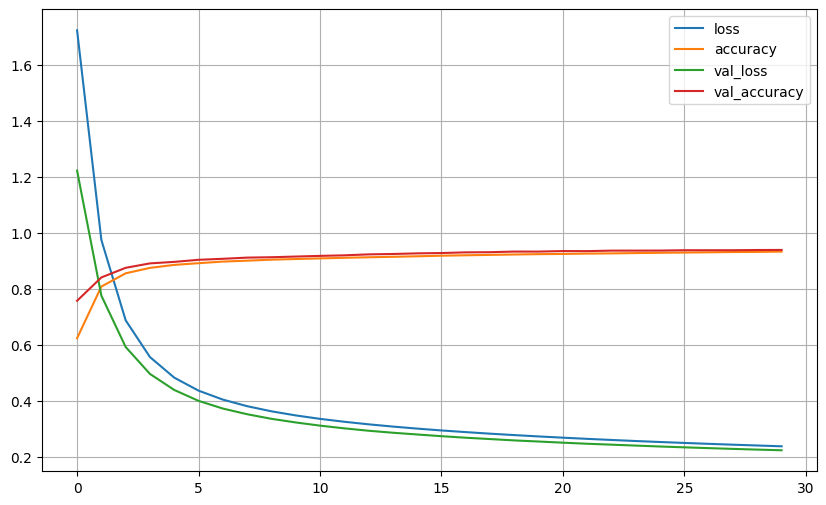

In [46]:
# TODO Plot the loss, accuracy, validation loss, and validation accuracy over the training epochs
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()

It appears from the above that most of the training gains are achieved by epoch 15. 

Now I'll evaluate the model against the test set

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9866


[0.09528502821922302, 0.9865999817848206]